In [2]:
import pandas as pd
power=pd.read_csv("power_consumption_2010.csv")
print(power.dtypes)
power.head()

Unnamed: 0         int64
date              object
time              object
globalpower      float64
voltage          float64
globintensity    float64
submetering1     float64
submetering2     float64
submetering3     float64
dtype: object


,Unnamed: 0,date,time,globalpower,voltage,globintensity,submetering1,submetering2,submetering3
0,1600236,1/1/2010,00:00:00,1.790,240.65,7.4,0.0,0.0,18.0
1,1600237,1/1/2010,00:01:00,1.780,240.07,7.4,0.0,0.0,18.0
2,1600238,1/1/2010,00:02:00,1.780,240.15,7.4,0.0,0.0,19.0
3,1600239,1/1/2010,00:03:00,1.746,240.26,7.2,0.0,0.0,18.0
4,1600240,1/1/2010,00:04:00,1.686,240.12,7.0,0.0,0.0,18.0


In [3]:
power.time

0         00:00:00
1         00:01:00
2         00:02:00
3         00:03:00
4         00:04:00
            ...   
475018    20:58:00
475019    20:59:00
475020    21:00:00
475021    21:01:00
475022    21:02:00
Name: time, Length: 475023, dtype: object

In [2]:
power.globalpower

0         1.790
1         1.780
2         1.780
3         1.746
4         1.686
          ...  
475018    0.946
475019    0.944
475020    0.938
475021    0.934
475022    0.932
Name: globalpower, Length: 475023, dtype: float64

In [4]:
power.globalpower

0         1.790
1         1.780
2         1.780
3         1.746
4         1.686
          ...  
475018    0.946
475019    0.944
475020    0.938
475021    0.934
475022    0.932
Name: globalpower, Length: 475023, dtype: float64

Text(0.5, 0, 'Zeile der Tabelle')

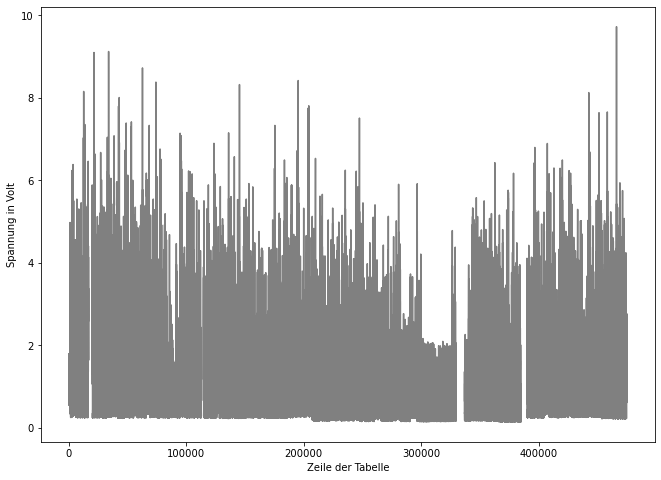

In [31]:
from matplotlib import pyplot as pp
figure,axis=pp.subplots(figsize=(11,8))
axis.plot(power.globalpower,color="grey")
axis.set_ylabel("Spannung in Volt")
axis.set_xlabel("Zeile der Tabelle")

In [12]:
len(power)

475023

In [6]:
from datetime import datetime

In [7]:
d=datetime.strptime("00:02:00","%H:%M:%S")

In [52]:
power[4:5]

,Unnamed: 0,date,time,globalpower,voltage,globintensity,submetering1,submetering2,submetering3,hour
4,1600240,1/1/2010,00:04:00,1.686,240.12,7.0,0.0,0.0,18.0,0


In [53]:
power.iloc[4]

Unnamed: 0        1600240
date             1/1/2010
time             00:04:00
globalpower         1.686
voltage            240.12
globintensity           7
submetering1            0
submetering2            0
submetering3           18
hour                    0
Name: 4, dtype: object

In [8]:
hours=[]
#for i in range(10):#zum Testen
for i in power.index:
    #print(power.iloc[i].time)
    hour=datetime.strptime(power.iloc[i].time,"%H:%M:%S").hour
    hours.append(hour)

In [55]:
len(hours)

475023

In [9]:
power["hour"]=hours

In [20]:
power.head()

,Unnamed: 0,date,time,globalpower,voltage,globintensity,submetering1,submetering2,submetering3,hour
0,1600236,1/1/2010,00:00:00,1.790,240.65,7.4,0.0,0.0,18.0,0
1,1600237,1/1/2010,00:01:00,1.780,240.07,7.4,0.0,0.0,18.0,0
2,1600238,1/1/2010,00:02:00,1.780,240.15,7.4,0.0,0.0,19.0,0
3,1600239,1/1/2010,00:03:00,1.746,240.26,7.2,0.0,0.0,18.0,0
4,1600240,1/1/2010,00:04:00,1.686,240.12,7.0,0.0,0.0,18.0,0


In [12]:
powerHours=power.groupby("hour")

In [26]:
powerHours.head(10)

,Unnamed: 0,date,time,globalpower,voltage,globintensity,submetering1,submetering2,submetering3,hour
0,1600236,1/1/2010,00:00:00,1.790,240.65,7.4,0.0,0.0,18.0,0
1,1600237,1/1/2010,00:01:00,1.780,240.07,7.4,0.0,0.0,18.0,0
2,1600238,1/1/2010,00:02:00,1.780,240.15,7.4,0.0,0.0,19.0,0
3,1600239,1/1/2010,00:03:00,1.746,240.26,7.2,0.0,0.0,18.0,0
4,1600240,1/1/2010,00:04:00,1.686,240.12,7.0,0.0,0.0,18.0,0
...,...,...,...,...,...,...,...,...,...,...
1385,1601621,1/1/2010,23:05:00,0.542,245.43,2.4,0.0,0.0,1.0,23
1386,1601622,1/1/2010,23:06:00,0.538,245.23,2.4,0.0,0.0,0.0,23
1387,1601623,1/1/2010,23:07:00,0.538,245.75,2.4,0.0,0.0,1.0,23
1388,1601624,1/1/2010,23:08:00,0.538,246.16,2.4,0.0,0.0,1.0,23


In [18]:
len(powerHours)

24

In [15]:
means=[]
stds=[]
for key,df in powerHours:
    print(key)
    means.append(df.globintensity.mean())
    stds.append(df.globintensity.std())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [27]:
import numpy as n
errorbars=n.array([n.zeros(len(means)),stds])
x=n.arange(len(means))

In [29]:
means

[2.848265412748128,
 2.4179101358411645,
 2.2405956112852503,
 1.968904224173924,
 1.911924290220728,
 1.8980862250262376,
 3.1094274146905168,
 6.244134812555961,
 5.7841324921137325,
 5.5510410094638685,
 5.422944269190412,
 5.47513144058895,
 5.345878023133645,
 4.9868494301770205,
 4.709070889261619,
 4.295231084704626,
 3.8910400673045884,
 4.234249960565649,
 5.239896945160076,
 6.5332496732026515,
 7.1690491118078254,
 7.071645237470565,
 5.5038784067087185,
 3.646383647798661]

Text(0.5, 0, 'Stunden eines Tages')

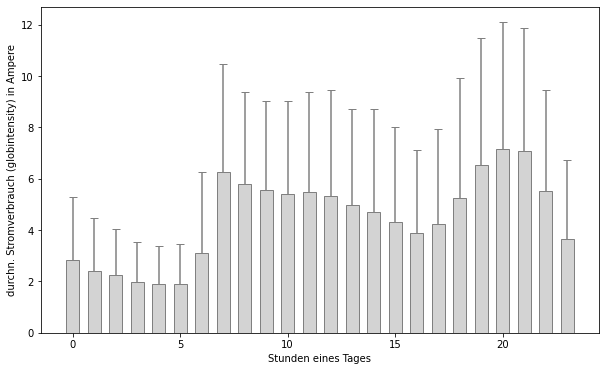

In [32]:
figure,axis=pp.subplots(figsize=(10,6))
axis.bar(x=x,height=means,width=0.6,yerr=errorbars,capsize=4,color="lightgray"
,edgecolor="gray",ecolor="gray")
axis.set_ylabel("durchn. Stromverbrauch (globintensity) in Ampere")
axis.set_xlabel("Stunden eines Tages")